### First data exploration :)

In [71]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

In [72]:
# Loading dataset
dataset_path = "../data/raw/dataset_ecommerce.csv"
df = pd.read_csv(dataset_path)

In [73]:
# Viewing data
print(df.head())
print(df.describe())

         ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
0  GGNEPpxo     198.0       44.0         3393.0              67.0   
1  tRA5byjK     303.0       74.0         3026.3              90.4   
2  vWxSsT0V     267.0       60.0         3490.2              80.5   
3  sxVV8jGL     177.0       85.0         3525.1              92.7   
4  YBs4XIN5     224.0       73.0         2980.9              72.6   

   dias_primera_compra  info_perfil  
0                241.0        235.0  
1                193.0        246.0  
2                111.0        220.0  
3                142.0        200.0  
4                227.0        109.0  
           n_clicks     n_visitas  monto_compras  monto_descuentos  \
count  55049.000000  55048.000000   55050.000000      55052.000000   
mean     408.723083     94.028702    1748.510134        448.956200   
std      175.677082     34.891261    1164.969753        503.152846   
min      -21.000000    -20.000000    -123.100000        -27.700000   
25%    

### Cleaning Data
In this section, we will begin by analyzing and handling NaN values.

In [74]:
# Viewing NaN values
print("Total NaN values per column:")
print(df.isna().sum())

Total NaN values per column:
ID                     0
n_clicks               7
n_visitas              8
monto_compras          6
monto_descuentos       4
dias_primera_compra    1
info_perfil            9
dtype: int64


In [75]:
# Looking for specific NaN values per column
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)

             ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
322    9tJuzqv2     234.0        NaN         2966.3              89.1   
575    fxADTnTp     302.0       72.0            NaN              72.9   
1794   2gf5Hlv4     320.0       48.0            NaN              88.3   
2355   DuIxWNRx     251.0       85.0         3218.3              82.8   
4461   m2qRM7GV     201.0       97.0         3290.1              99.0   
5145   9gXNhlkr       NaN       84.0         2447.6              99.0   
5213   xXneFmSB     213.0       49.0         4715.4              71.1   
12176  Aivyl6NW     295.0       53.0            NaN              67.5   
12821  wFI0ve3K     237.0        NaN         3416.8              80.8   
16540  3rLG6MOc     259.0       78.0         3554.5             106.1   
17162  awa5cwh8       NaN       64.0         2939.2              64.6   
25421  6beOIYdL     455.0      127.0            NaN            1184.8   
25453  yIkbk0y9     607.0        NaN         1546.9

* NaN values in the `n_clicks` column will be replaced with 0. Because if the client has not made any clicks, the actual value of number of clicks if 0.
* NaN values in the `monto_compras` column will be replaced with 0. This is because if the client has not made any purchases, the actual value of the purchases is 0.

In [51]:
dfc = df.dropna()  # Elimina las filas con valores nulos
print(dfc.describe())

           n_clicks     n_visitas  monto_compras  monto_descuentos  \
count  55021.000000  55021.000000   55021.000000      55021.000000   
mean     408.719144     94.028771    1748.575528        448.978468   
std      175.685122     34.893428    1164.965794        503.140330   
min      -21.000000    -20.000000    -123.100000        -27.700000   
25%      267.000000     67.000000     749.800000         87.500000   
50%      369.000000     87.000000    1380.200000        145.400000   
75%      528.000000    117.000000    2787.500000        932.800000   
max     1185.000000    258.000000    5621.600000       2214.100000   

       dias_primera_compra   info_perfil  
count         55021.000000  55021.000000  
mean            197.102706    176.207884  
std              48.532080     43.644943  
min             -16.000000    -15.000000  
25%             165.000000    147.000000  
50%             197.000000    177.000000  
75%             229.000000    205.000000  
max             417.00000

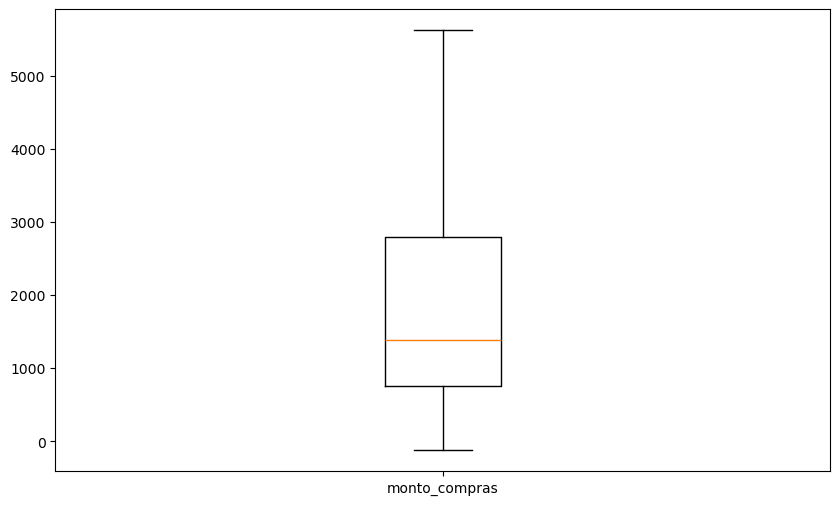

In [54]:
plt.figure(figsize=(10,6))
plt.boxplot([dfc["monto_compras"]], tick_labels=["monto_compras"])
plt.show()